In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pickle
#%matplotlib inline
#%pylab inline
#pylab.rcParams['figure.figsize'] = (7.0, 5.0)
import scipy.stats as sc
from IPython.display import HTML, display
import ipywidgets as wg

# Correlation time

In [2]:
def uncorr_err(Lx_err, Lx_tau):
    Lx_max_tau = []
    for i,taus in enumerate(Lx_tau):
        max_tau = np.nanmax(taus)
        x_max_tau = np.tile(max_tau, len(taus))
        Lx_max_tau.append(x_max_tau)
    Lx_terr = np.sqrt((1+2*np.array(Lx_max_tau))*np.array(Lx_err))
    #Lx_terr = np.sqrt((1+2*np.array(Lx_tau))*np.array(Lx_err))
    return(Lx_terr)

In [3]:
CorrData = pickle.load(open('2DcorrData.p', 'rb'))
possibleScales = CorrData['possibleScales']; temperatures = CorrData['temperatures']
LcorrEdata = CorrData['LcorrEdata']; LtauEdata = CorrData['LtauEdata']
LcorrMdata = CorrData['LcorrMdata']; LtauMdata = CorrData['LtauMdata']
LcorrNEGdata = CorrData['LcorrNEGdata']; LtauNEGdata = CorrData['LtauNEGdata']
LcorrEnw_data = CorrData['LcorrEnw_data']; LtauEnw_data = CorrData['LtauEnw_data']
Lcorr_neg_data = CorrData['Lcorr_neg_data']; Ltau_neg_data = CorrData['Ltau_neg_data']
Lcorr_nwe_data = CorrData['Lcorr_nwe_data']; Ltau_nwe_data = CorrData['Ltau_nwe_data']

In [4]:
tauData = [['','MAXtauE', 'MAXtauM', 'MAXtauNEG', 'MAXtauEnw']]

for i,L in enumerate(possibleScales):
    row = []
    tauE = round(np.nanmax(LtauEdata[i]),3); tauM = round(np.nanmax(LtauMdata[i]),3)
    tauNEG = round(np.nanmax(LtauNEGdata[i]),3); tauEnw = round(np.nanmax(LtauEnw_data[i]),3)
    j = np.nanargmax(LtauEdata[i]); k = np.nanargmax(LtauMdata[i])
    m = np.nanargmax(LtauNEGdata[i]); n = np.nanargmax(LtauEnw_data[i])
    T1 = temperatures[j]; T2 = temperatures[k]; T3 = temperatures[m]; T4 = temperatures[n]
    row.append('L = %d'%(L)); row.append('%.1f (T=%.2f)'%(tauE,T1)); row.append('%.1f (T=%.2f)'%(tauM,T2))
    row.append('%.1f (T=%.2f)'%(tauNEG,T3)); row.append('%.1f (T=%.2f)'%(tauEnw,T4))
    tauData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tauData))))

tau_negData = [['','MAXtau_neg0', 'MAXtau_neg1', 'Maxtau_neg2', 'etc']]

for i,L in enumerate(possibleScales):
    row = []; row.append('L = %d'%(L));
    tau_neg_ls = np.nanmax(Ltau_neg_data[i],axis=0); qs = np.nanargmax(Ltau_neg_data[i],axis=0)
    for tau_neg_l,q in zip(tau_neg_ls,qs):
        T5 = temperatures[q]; row.append('%.1f (T=%.2f)'%(tau_neg_l,T5))
    tau_negData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tau_negData))))

tau_nweData = [['','MAXtau_nwe0', 'MAXtau_nwe1', 'Maxtau_nwe2', 'etc']]

for i,L in enumerate(possibleScales):
    row = []; row.append('L = %d'%(L));
    tau_nwe_ls = np.nanmax(Ltau_nwe_data[i],axis=0); rs = np.nanargmax(Ltau_nwe_data[i],axis=0)
    for tau_nwe_l,r in zip(tau_nwe_ls,rs):
        T6 = temperatures[r]; row.append('%.1f (T=%.2f)'%(tau_nwe_l,T6))
    tau_nweData.append(row)
    
display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tau_nweData))))

,MAXtauE,MAXtauM,MAXtauNEG,MAXtauEnw
L = 8,11.3 (T=5.70),6.5 (T=8.00),9.8 (T=4.58),9.8 (T=4.58)
L = 16,41.2 (T=6.47),21.3 (T=7.23),47.5 (T=8.00),47.5 (T=8.00)
L = 32,179.2 (T=5.70),43.0 (T=5.00),160.8 (T=5.70),160.8 (T=5.70)


LxL = 8x8


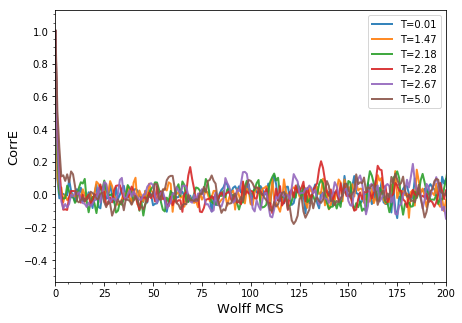

In [5]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
t = np.arange(len(LcorrEdata[0][0]))
i = 0 # index of scales
L = possibleScales[i]
k = 0 # index of temperature
step = 6

for j, item in enumerate(temperatures[::step]):
    if j == j:
        ax1.plot(t,LcorrEdata[i][j+step], linewidth=2, label=('T={}'.format(np.around(item,2))), alpha=0.9)

    
ax1.set_xlabel('Wolff MCS',fontsize=13); ax1.set_ylabel('CorrE', fontsize=13)
ax1.legend()
ax1.set_xlim([0,200])
ax1.minorticks_on()

print('LxL = %dx%d'%(L,L))
#print('Correlation time (decay length) of the energy(nng):', LtauE[i])
#print('Correlation time (decay length) of the magnetization:', LtauM[i])

if save:
    plt.savefig('RG2DcorrE_vs_t')

LxL = 32x32


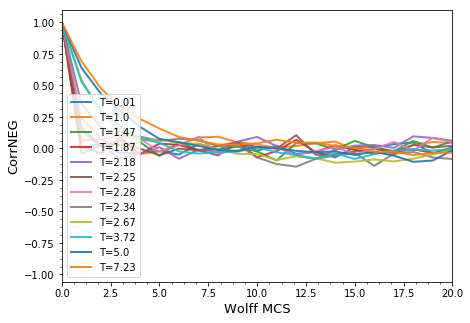

In [6]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
t = np.arange(len(LcorrEdata[0][0]))
i = 2 # index of scales
L = possibleScales[i]
k = 0 # index of temperature
step = 3

for j, item in enumerate(temperatures[::step]):
    if j == j:
        ax1.plot(t,LcorrNEGdata[i][j+step], linewidth=2, label=('T={}'.format(np.around(item,2))), alpha=0.9)

    
ax1.set_xlabel('Wolff MCS',fontsize=13); ax1.set_ylabel('CorrNEG', fontsize=13)
ax1.legend()
ax1.set_xlim([0,20])
ax1.minorticks_on()

print('LxL = %dx%d'%(L,L))
#print('Correlation time (decay length) of the energy(nng):', LtauE[i])
#print('Correlation time (decay length) of the magnetization:', LtauM[i])

if save:
    plt.savefig('RG2DcorrE_vs_t')

LxL = 32x32


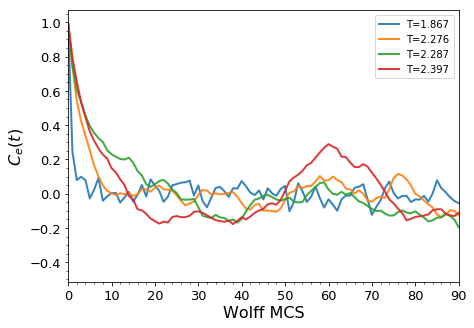

In [7]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
t = np.arange(len(LcorrEdata[0][0]))
i = 2 # index of scales
L = possibleScales[i]
k = [9,18,19,22] # indices of temperature

for j in k:
    T = temperatures[j]
    
    
    ax1.plot(t,LcorrNEGdata[i][j], linewidth=2, label=('T={}'.format(np.around(T,3))), alpha=0.9)

    
ax1.set_xlabel('Wolff MCS',fontsize=16); ax1.set_ylabel('$C_e(t)$', fontsize=16)
ax1.legend()
ax1.set_xlim([0,90])
ax1.minorticks_on()
ax1.tick_params(axis='both', which='both', labelsize=13)

print('LxL = %dx%d'%(L,L))
#print('Correlation time (decay length) of the energy(nng):', LtauE[i])
#print('Correlation time (decay length) of the magnetization:', LtauM[i])

if save:
    plt.savefig('RG2DcorrNEG_vs_t')

# Energy function

In [8]:
Ldata = pickle.load(open('2Dfinite_size_scaling_data.p', 'rb'))
Len_data = Ldata['Len_data']; Len_err = Ldata['Len_err']; L_CvEdata = Ldata['L_CvEdata']
L_NEGdata = Ldata['L_NEGdata']; L_NEGerr = Ldata['L_NEGerr']; L_CvNEGdata = Ldata['L_CvNEGdata']
Len_nw_data = Ldata['Len_nw_data']; Len_nw_err = Ldata['Len_nw_err']; L_CvEnw_data = Ldata['L_CvEnw_data']
Lneg_data = Ldata['Lneg_data']; Lneg_err = Ldata['Lneg_err']; L_Cv_neg_data = Ldata['L_Cv_neg_data']
Lnwe_data = Ldata['Lnwe_data']; Lnwe_err = Ldata['Lnwe_err']; L_Cv_nwe_data = Ldata['L_Cv_nwe_data']
temperatures = Ldata['temperatures']; scales = Ldata['scales']; t_prod = Ldata['t_prod']

#Lnng_data = np.array(Lnng_data); substract = np.array(scales)
#substract = substract[:,np.newaxis]
#substract = tile(substract, (1,Lnng_data.shape[1]))

#Lnng_data = (Lnng_data-substract)/substract
print('results for the regular Ising model were gathered from the following number of sampled configurations:', t_prod)

results for the regular Ising model were gathered from the following number of sampled configurations: 25000


In [9]:
Len_terr = uncorr_err(Len_err, LtauEdata); L_NEGterr = uncorr_err(L_NEGerr, LtauNEGdata)
Len_nw_terr = uncorr_err(Len_nw_err, LtauEnw_data)
print(Len_terr)
print(L_NEGterr)

[[  0.           0.           2.11569934   5.24652063   7.61112098
    9.27507371  10.81237165  12.49456008  14.14460873  15.93135388
   17.93204439  19.45132884  20.35386476  20.98553509  21.12056759
   21.1569989   21.41902401  21.4201205   21.58203276  21.54630029
   21.72806285  21.94013241  22.15256755  22.1944819   21.51448383
   20.02339583  18.9703976   18.18546267  17.80903296  17.22914106
   17.1385244   17.08967388  16.94390664  16.63722088  16.70557892]
 [  0.           0.           5.25721537  14.20487768  20.49172045
   24.61018518  28.73905422  33.28490707  37.31742286  42.4394324
   47.63587083  53.12368343  57.0178689   58.98504055  59.52950387
   60.51502567  60.2928584   60.74262344  60.75050438  60.9217069
   61.78538776  62.51152016  61.6744336   58.78640802  54.47070046
   50.71860906  49.16878329  47.4027178   46.35018738  47.20112365
   46.73917283  45.09144854  45.34414808  45.03654805  43.9669682 ]
 [  0.           0.          15.0255655   42.02980387  59.8113

In [10]:
print(len(Len_data[0]))

35


##### Finite size scaling

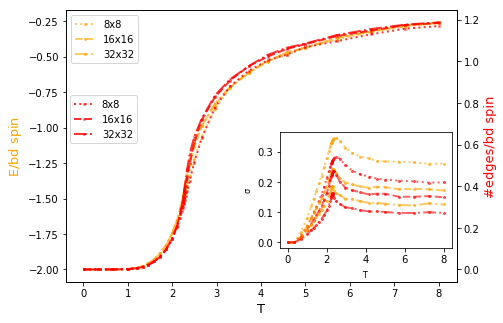

In [11]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E}$/bd spin', fontsize=13, color='orange')
ax2.set_ylabel('#edges/bd spin', fontsize=13, color='r')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.55, 0.22, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    
    ax1.plot(temperatures, Len_data[i]/(L**2), marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax2.plot(temperatures, (L_NEGdata[i])/(L**2), marker='x',markersize=2, alpha=0.8, label='%dx%d'%(L,L), color='r', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Len_terr[i]/(L**2),  marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, L_NEGterr[i]/(L**2),  marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), color='r', 
             linestyle=ls[i], linewidth=2)
    #if i==i or i==i:
        #ax1.errorbar(temperatures, Len_data[i]/(L**2), yerr=Len_terr[i]/L, alpha=0.2, color='orange', linestyle='')
        #ax2.errorbar(temperatures, Lnng_data[i]/L, yerr=Lnng_err[i]/L, alpha=0.2, color='r', linestyle='')
    
ax1.legend(loc='upper left'); 
ax2.legend(loc=(0.01,0.51))
#ax1.set_ylim([-1.1,0.03])
#ax2.set_ylim([0.9,1.9])

if save:
    plt.savefig('RG2D_L_E_NEG_vs_T')

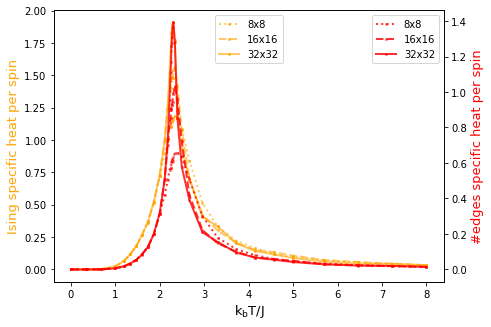

In [12]:
save = False

fig1 = plt.figure(figsize=(7,5))
ax11 = fig1.add_subplot(1,1,1); ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax11.set_ylabel('Ising specific heat per spin', fontsize=13, color='orange')
ax12.set_ylabel('#edges specific heat per spin', fontsize=13, color='r')
ls = [':', '--', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, L_CvEdata[i]/(L**2), marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), color='orange',
            linestyle=ls[i], linewidth=2)
    ax12.plot(temperatures, L_CvNEGdata[i]/(L**2), marker='x',markersize=2, alpha=0.8, label='%dx%d'%(L,L), color='r',
            linestyle=ls[i], linewidth=2)
ax11.legend(loc='upper center')
ax12.legend()

if save:
    plt.savefig('RG2D_L_CvE_CvNEG_vs_T')

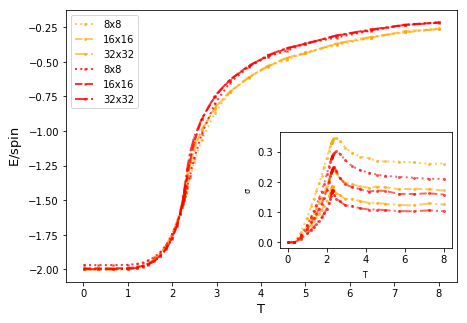

In [13]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E}$/spin', fontsize=13, color='black')
#ax2.set_ylabel('$\mathrm{E_{nw}/L}$', fontsize=13, color='r')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.55, 0.22, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

geom = 4/3

for i,L in enumerate(scales[0:]):
    
    ax1.plot(temperatures, Len_data[i]/(L**2), marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), color='orange', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Len_terr[i]/(L**2),  marker='o', markersize=2, alpha=0.6, label='L=%dx%d'%(L,L), color='orange', 
             linestyle=ls[i], linewidth=2)
    #if i==i or i==i:
        #ax1.errorbar(temperatures, Len_data[i]/L, yerr=Len_terr[i]/L, alpha=0.2, color='orange', linestyle='')
        #ax2.errorbar(temperatures, Lnng_data[i]/L, yerr=Lnng_err[i]/L, alpha=0.2, color='r', linestyle='')
for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, Len_nw_data[i]/(geom*(L**2)), marker='x',markersize=2, alpha=0.8, label='%dx%d'%(L,L), color='r', 
             linestyle=ls[i], linewidth=2)
    ax3.plot(temperatures, Len_nw_terr[i]/(geom*(L**2)),  marker='o', markersize=2, alpha=0.6, label='%dx%d'%(L,L), color='r', 
             linestyle=ls[i], linewidth=2)
    
ax1.legend(loc='upper left'); 
ax2.legend(loc=(0.01,0.51))
#ax1.set_ylim([-1.1,0.03])
#ax2.set_ylim([0.9,1.9])

if save:
    plt.savefig('RG2D_L_E_NEG_vs_T')

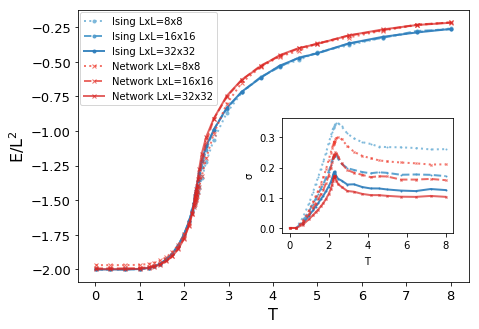

In [14]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('2D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{E/L^2}$', fontsize=16)#, color='orange')
#ax2.set_ylabel('$\mathrm{E_{nw}/L}$', fontsize=13, color='r')
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = [':', '--', '-'] #color=cm.viridis(i*70; cm.autumn; cm.winter
left, bottom, width, height = [0.53, 0.26, 0.34, 0.32]
ax3 = fig.add_axes([left, bottom, width, height])
ax3.set_xlabel('$\mathrm{T}$',fontsize=10)
ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=10)

geom = 4/3

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, Len_data[i]/(L**2), marker='o', markersize=3, alpha=0.9, label='Ising LxL=%dx%d'%(L,L), 
             color=cm.Blues(120+i*30), linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures[i:], Len_data[i][i:]/L, yerr=Len_terr[i][i:]/L, alpha=0.5, color=cm.winter(i*100), linestyle='', 
                 #errorevery=3, capsize=3)
    ax3.plot(temperatures[i:], Len_terr[i][i:]/(L**2),  marker='o', markersize=1, alpha=0.9, label='LxL=%dx%d'%(L,L), 
             color=cm.Blues(120+i*30), linestyle=ls[i], linewidth=2)
    
for i,L in enumerate(scales[0:]): 
    ax1.plot(temperatures, Len_nw_data[i]/(geom*(L**2)), marker='x',markersize=4, alpha=0.7, label='Network LxL=%dx%d'%(L,L), 
             color=cm.Reds(160+i*10), linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures[i:], Len_nw_data[i][i:]/L, yerr=Len_nw_terr[i][i:]/L, alpha=0.5, color=cm.autumn(i*60), 
                 #linestyle='', errorevery=3, capsize=3)
    ax3.plot(temperatures, Len_nw_terr[i]/(geom*(L**2)),  marker='x', markersize=2, alpha=0.7, label='LxL=%dx%d'%(L,L), 
             color=cm.Reds(160+i*10), linestyle=ls[i], linewidth=2)

#ax1.legend(loc=(0.015,0.95), ncol=1, framealpha=1)
ax1.legend(loc=(0.005,0.65)); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('RG2D_L_E_Enw_vs_T', bbox_inches='tight')

In [15]:
LrEnwE = (np.array(Len_nw_data))/(np.array(Len_data))
print(LrEnwE)

[[1.3125     1.3125     1.31251094 1.31288573 1.31412866 1.31583248
  1.31839402 1.32173257 1.3262216  1.33076474 1.33463878 1.33698918
  1.33552517 1.33487559 1.33350332 1.33442378 1.33221702 1.33208037
  1.33091506 1.33182181 1.32854455 1.326401   1.31997496 1.30535538
  1.27916871 1.2327205  1.20121731 1.16927207 1.16117937 1.15015554
  1.13788469 1.13472377 1.12766171 1.09240074 1.10768158]
 [1.328125   1.328125   1.32813382 1.32857198 1.3298731  1.33163006
  1.33426327 1.33793947 1.3426303  1.34793042 1.35255521 1.35398377
  1.35052712 1.34587465 1.34348431 1.34133341 1.33994202 1.33842232
  1.33754262 1.33502321 1.32969468 1.32015947 1.30129413 1.26866347
  1.23175764 1.19725943 1.1725052  1.15190811 1.13795429 1.14605023
  1.11924475 1.12160831 1.10886911 1.11073816 1.08723387]
 [1.33203125 1.33203125 1.33203919 1.33248609 1.33380006 1.33560178
  1.33825962 1.3420252  1.34681669 1.35222154 1.3571546  1.35864558
  1.35543463 1.34975252 1.34468498 1.34102643 1.33794751 1.33546939


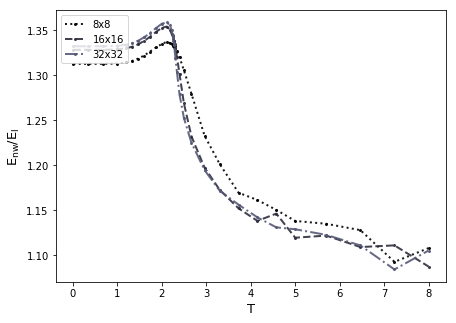

In [16]:
save = False

fig = plt.figure(figsize=(7,5))#; fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)#; ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E_{nw}/E_I}$', fontsize=13)#, color='orange')
ls = [':', '--', '-.', '-'] #color=cm.viridis(i*70)
left, bottom, width, height = [0.53, 0.38, 0.34, 0.32]
#ax3 = fig.add_axes([left, bottom, width, height])
#ax3.set_xlabel('$\mathrm{T}$',fontsize=8)
#ax3.set_ylabel('$\mathrm{\sigma}$', fontsize=8)

for i,L in enumerate(scales[0:]):
    ax1.plot(temperatures, LrEnwE[i], marker='o', markersize=2, alpha=0.9, label='%dx%d'%(L,L), 
             color=cm.bone(i*50), linestyle=ls[i], linewidth=2)

    
ax1.legend(loc='upper left'); 
#ax2.legend(loc='lower right')

if save:
    plt.savefig('RG2D_LrEnwE_vs_T')

##### Largest scale

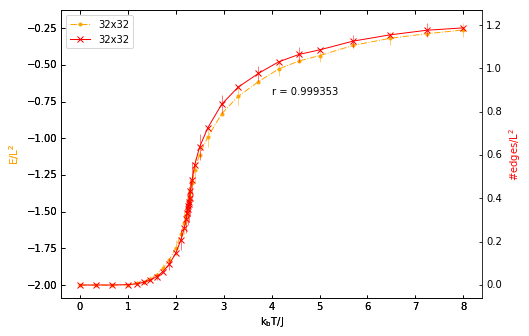

In [17]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]

from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes

fig = plt.figure(figsize=(9,5))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Temperature")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

#par2.set_ylabel("allometric/$\mathrm{L^2}$")
#offset = (60, 0)
#new_axisline = par2._grid_helper.new_fixed_axis
#par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)

host.set_xlabel("$\mathrm{k_bT/J}$", fontsize=13)
host.set_ylabel("$\mathrm{E/L^2}$", fontsize=13)
par1.set_ylabel("#edges/$\mathrm{L^2}$")

p1, = host.plot(temperatures, Len_data[Lidx]/(L**2), label="%dx%d"%(L,L), marker='o', markersize=3, color='orange', 
                linestyle='-.', linewidth=1)
p2, = par1.plot(temperatures, L_NEGdata[Lidx]/(L**2), label="%dx%d"%(L,L), marker='x', markersize=6, color='r', 
                linewidth=1)
p1err = host.errorbar(temperatures, Len_data[Lidx]/(L**2), yerr=Len_err[Lidx]/(L**2), fmt='none', color=p1.get_color(), 
                      elinewidth=0.5, errorevery=2)
p2err = par1.errorbar(temperatures[1:], L_NEGdata[Lidx][1:]/(L**2), yerr=L_NEGerr[Lidx][1:]/(L**2), fmt='none', 
                      color=p2.get_color(), elinewidth=0.5, errorevery=2)

#par1.set_ylim(0, 4)
host.legend()
r = np.corrcoef(Len_data[Lidx], L_NEGdata[Lidx])[0,1]
host.annotate('r = %.6f'%(r), (4,-0.7))

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
#par2.axis["right2"].label.set_color(p3.get_color())

if save:
    plt.savefig('RG2D_E_NEG_vs_T_LxL=%dx%d'%(L,L))

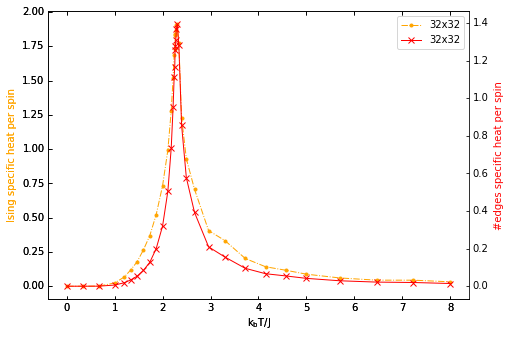

In [18]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]

fig = plt.figure(figsize=(9,5))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)
par1.set_ylabel("Temperature")

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

fig.add_axes(host)

#host.set_xlim(0, 2)
#host.set_ylim(0, 2)

host.set_xlabel("$\mathrm{k_bT/J}$", fontsize=13)
host.set_ylabel("Ising specific heat per spin", fontsize=13)
par1.set_ylabel("#edges specific heat per spin")

p1, = host.plot(temperatures, L_CvEdata[Lidx]/(L**2), label="%dx%d"%(L,L), marker='o', markersize=3, color='orange', 
                linestyle='-.', linewidth=1)
p2, = par1.plot(temperatures, L_CvNEGdata[Lidx]/(L**2), label="%dx%d"%(L,L), marker='x', markersize=6, color='r', linewidth=1)

#par1.set_ylim(0, 4)
#par2.set_ylim(1, 65)
host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

if save:
    plt.savefig('RG2D_CvE_CvNEG_vs_T_LxL=%dx%d'%(L,L))

##### RG energy~inner edges

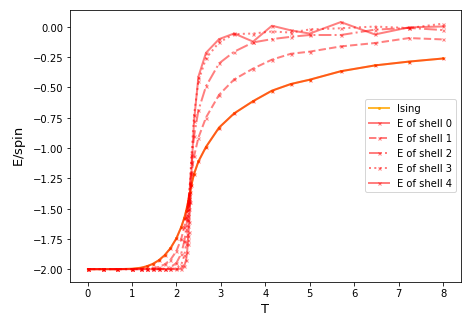

In [19]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]
nRGsteps = len(Lneg_data[Lidx][0,:])
step = 1

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/spin}$', fontsize=13, color='black')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

ax1.plot(temperatures, Len_data[Lidx]/(L**2), marker='o', markersize=2, alpha=0.8, label='Ising', color='orange', 
             linestyle=ls[0], linewidth=2)
for i in range(nRGsteps)[::step]:
    l = np.arange(nRGsteps)
    n_l = L/(2**l)
    ax1.plot(temperatures, Lnwe_data[Lidx][:,i]/(n_l[i]**2), marker='x', markersize=3, alpha=0.5, label='E of shell %d'%(i), 
             color='r', linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')

    #ax2.errorbar(temperatures, Lneg_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='center right'); 
ax2.legend(loc='lower right')
ax1.annotate('L=%d'%(L), (0,0.7))

if save:
    plt.savefig('RG2D_Enwe_vs_T_LxL=%dx%d'%(L,L))

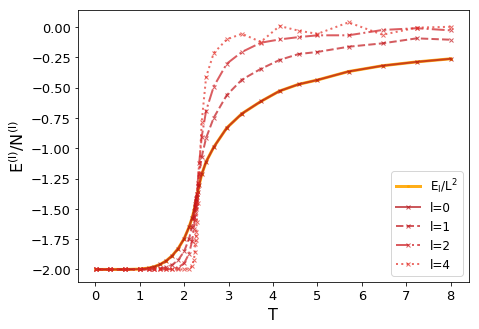

In [20]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]
nRGsteps = len(Lneg_data[Lidx][0,:])
show_shells = [0,1,2,4]

fig = plt.figure(figsize=(7,5))#; fig.suptitle('2D, L=%d'%(L))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{T}$',fontsize=16)
ax1.set_ylabel('$\mathrm{E^{(l)}/N^{(l)}}$', fontsize=16, color='black')
ax1.tick_params(axis='both', which='both', labelsize=13)
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

ax1.plot(temperatures, Len_data[Lidx]/(L**2), marker='o', markersize=2, alpha=0.9, color='orange', label='$\mathrm{E_I/L^2}$',
             linestyle=ls[0], linewidth=3)
for i in show_shells:
    l = np.arange(nRGsteps)
    n_l = L/(2**l)
    ax1.plot(temperatures, Lnwe_data[Lidx][:,i]/(n_l[i]**2), marker='x', markersize=4, alpha=0.7, label='l=%d'%(i), 
             color=cm.Reds(210-i*10), linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')

    #ax1.errorbar(temperatures, Lnwe_data[Lidx][:,i]/n_l[i], yerr=Lnwe_err[Lidx][:,i]/n_l[i], alpha=0.5, color=cm.Reds(210-i*10), 
                 #linestyle='', capsize=3, errorevery=i+1)
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='lower right', prop={'size': 12}); 
#ax1.annotate('L=%d'%(L), (0,0.7))

if save:
    plt.savefig('RG2D_Enwe_vs_T_LxL=%dx%d'%(L,L), bbox_inches='tight')

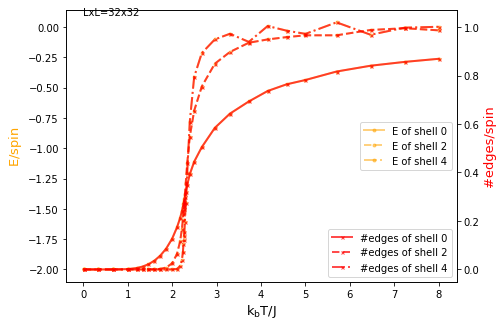

In [21]:
save = False
Lidx  = 2 # scale index
L = scales[Lidx]
nRGsteps = len(Lneg_data[Lidx][0,:])
step = 2

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1); ax2 = ax1.twinx()
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{E/spin}$', fontsize=13, color='orange')
ax2.set_ylabel('#edges/spin', fontsize=13, color='r')
ls = ['-', '--', '-.', ':']#color=cm.viridis(i*70)
tel = 0

for i in range(nRGsteps)[::step]:
    l = np.arange(nRGsteps)
    n_l = (L)/(2**l)
    ax1.plot(temperatures, Lnwe_data[Lidx][:,i]/(n_l[i]**2), marker='o', markersize=3, alpha=0.5, label='E of shell %d'%(i), 
             color='orange', linestyle=ls[tel], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax2.plot(temperatures, Lneg_data[Lidx][:,i]/(n_l[i]**2), marker='x',markersize=3, alpha=0.7, label='#edges of shell %d'%(i), 
             color='r', linestyle=ls[tel], linewidth=2)
    #ax2.errorbar(temperatures, Lneg_data[i], yerr=Lnng_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    tel += 1
    tel %= len(ls)
    
ax1.legend(loc='center right'); 
ax2.legend(loc='lower right')
ax1.annotate('LxL=%dx%d'%(L,L), (0,0.1))

if save:
    plt.savefig('RG2D_nwe_neg_vs_T_LxL=%dx%d'%(L,L))

##### Magnetization

In [22]:
Ldata_mag = pickle.load(open('2Dfinite_size_scaling_data_mag.p', 'rb'))
Lmag_data= Ldata_mag['Lmag_data']; Lmag_err = Ldata_mag['Lmag_err']; Lsusc_data = Ldata_mag['Lsusc_data']
temperatures = Ldata_mag['temperatures']; scales = Ldata_mag['scales']; t_prod = Ldata_mag['t_prod']
print('results for the regular Ising model were gathered from the following number of sampled configurations:', t_prod)

results for the regular Ising model were gathered from the following number of sampled configurations: 25000


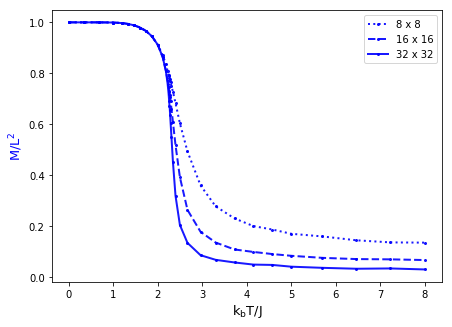

In [23]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{M/L^2}$', fontsize=13, color='b')
ls = [':', '--', '-'] #['-', '--', '-.', ':']color=cm.viridis(i*70)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Lmag_data[i]/(L**2), marker='o', markersize=2, alpha=0.9, label='%d x %d'%(L,L), color='b', 
             linestyle=ls[i], linewidth=2)
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    
ax1.legend()

if save:
    plt.savefig('RG2D_L_M_vs_T')

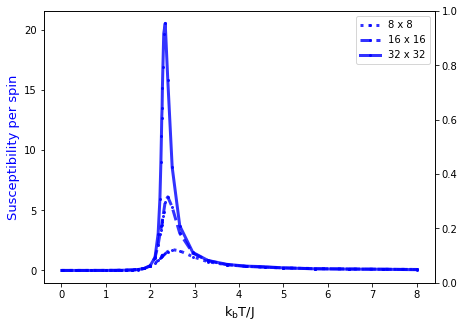

In [24]:
save = False

fig1 = plt.figure(figsize=(7,5))
ax11 = fig1.add_subplot(1,1,1); ax12 = ax11.twinx()
ax11.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax11.set_ylabel('Susceptibility per spin', fontsize=13, color='b')
ls = [':', '--', '-']

for i,L in enumerate(scales):
    ax11.plot(temperatures, Lsusc_data[i]/(L**2), marker='o', markersize=2, alpha=0.8, label='%d x %d'%(L,L), color='b',
            linestyle=ls[i], linewidth=3)

ax11.legend()

if save:
    plt.savefig('RG2D_Lsusc_vs_T')

# Free Energy

In [25]:
Lf_data = pickle.load(open('2Dfree_energy_finite_size_scaling.p', 'rb'))
f_exact = Lf_data['f_exact']; Len_fr = Lf_data['Len_fr']; LenS = Lf_data['LenS']; Len_data = Lf_data['Len_data']
Len_err = Lf_data['Len_err']; Len_hist_data = Lf_data['Len_hist_data']; Len_bin_edges_data = Lf_data['Len_bin_edges_data']
temperatures = Lf_data['temperatures']; scales= Lf_data['scales']; t_prod = Lf_data['t_prod'] 
print('results were gathered from the following number of sampled configurations:', t_prod)

results were gathered from the following number of sampled configurations: 40000


In [26]:
Len_fr_err = []

for i,L in enumerate(scales):
    e = abs(Len_fr[i]/(L**2)-f_exact)
    Len_fr_err.append(e)

##### Energy histograms

In [27]:
def check_visual(i, hists, bins):

    fig = plt.figure(figsize=(7,5))
    ax = fig.add_subplot(1,1,1)
    
    b1 = bins[i]
    h1 = hists[i]
    l = np.argmax(h1)
    temperature1 = temperatures[i]
    
    b2 = bins[i+1]
    h2 = hists[i+1]
    k = np.argmax(h2)+1
    temperature2 = temperatures[i+1]
    
    ax.plot(b1/(L**2), h1,label='T=%.2f'%(temperature1), markersize=3, linestyle='-', marker='o', linewidth=1, color='#1f77b4')
    ax.plot(b1[l:]/(L**2), h1[l:], markersize=6, color='#1f77b4', marker='o', linewidth=2)
    
    ax.plot(b2/(L**2), h2,label='T=%.2f'%(temperature2), markersize=3, linestyle='-', marker='o', linewidth=1, color='orange')
    ax.plot(b2[:k]/(L**2), h2[:k], markersize=6, color='orange', marker='o', linewidth=2)
    
    ax.legend()
    #ax5.set_yscale('log')

LxL=8x8


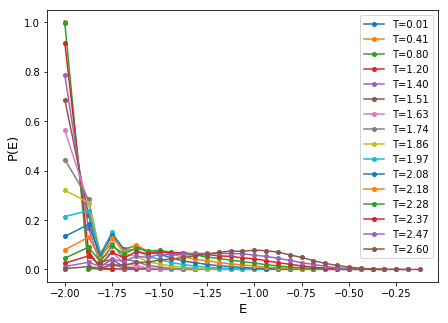

In [28]:
%matplotlib inline
fig5 = plt.figure(figsize=(7,5))
ax5 = fig5.add_subplot(1,1,1)
ax5.set_xlabel('E', fontsize=13)
ax5.set_ylabel('P(E)', fontsize=13)

idx = 0
L = scales[idx]
print('LxL=%dx%d'%(L,L))

l = 0
k = 15
for i,temperature in enumerate(temperatures[l:k+1]):
    ax5.plot(Len_bin_edges_data[idx][l+i]/(L**2), Len_hist_data[idx][l+i],label='T=%.2f'%(temperature), markersize=4, 
             linestyle='-', marker='o')
    
ax5.legend()
#ax5.set_yscale('log')

save = False
if save:
    plt.savefig('RG2Den_hist_%d_%d'%(l,k))

In [29]:
print('LxL=%dx%d'%(L,L))
wg.interact(check_visual, hists=wg.fixed(Len_hist_data[idx]), bins=wg.fixed(Len_bin_edges_data[idx]), i=(0,len(temperatures)-2))

LxL=8x8


interactive(children=(IntSlider(value=11, description='i', max=23), Output()), _dom_classes=('widget-interact'…

<function __main__.check_visual(i, hists, bins)>

##### Free Energy finite size scaling

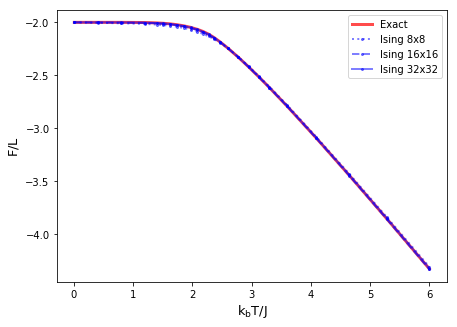

In [30]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{F/L}$', fontsize=13)
ls = [':', '--', '-'] #['-', '--', '-.', ':']color=cm.viridis(i*70)
ax1.plot(temperatures, f_exact, alpha=0.7, label='Exact', color='r', linewidth=3)

for i,L in enumerate(scales):
    ax1.plot(temperatures, Len_fr[i]/(L**2), marker='o', markersize=2, alpha=0.5, label='Ising %dx%d'%(L,L), 
             linestyle=ls[i], linewidth=2, color='b')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')

ax1.legend()

if save:
    plt.savefig('RG2D_Len_fr_vs_T')

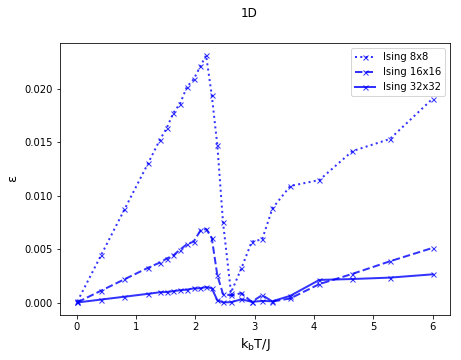

In [31]:
save = False

fig = plt.figure(figsize=(7,5)); fig.suptitle('1D')
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{\epsilon}$', fontsize=13)#, color='b')
ls = [':', '--', '-'] #['-', '--', '-.', ':']color=cm.viridis(i*70)

for i,L in enumerate(scales):
    #ax1.plot(temperatures, Len_fr[i]/L, marker='o', markersize=2, alpha=0.5, label='Ising %d'%(L), 
    #         linestyle=ls[i], linewidth=2, color='b')
    #ax1.errorbar(temperatures, Len_data[i], yerr=Len_err[i], alpha=0.2, color=cm.viridis(i*70), linestyle='')
    ax1.plot(temperatures, Len_fr_err[i], marker='x',markersize=5, alpha=0.8, label='Ising %dx%d'%(L,L), color='b', 
             linestyle=ls[i], linewidth=2)
    
#ax1.legend(loc='upper left'); 
ax1.legend()

if save:
    plt.savefig('RG2D_Len_fr_err_vs_T')

Entropy:

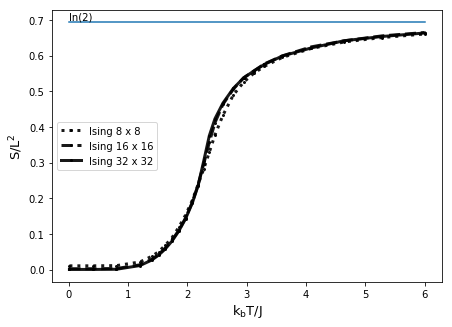

In [32]:
save = False

fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('$\mathrm{k_bT/J}$',fontsize=13)
ax1.set_ylabel('$\mathrm{S/L^2}$', fontsize=13, color='black')
#ax1.set_ylim(-0.1,0.8)
ls = [':', '--', '-'] #['-', '--', '-.', ':']color=cm.viridis(i*70)

ax1.plot(temperatures, np.tile(np.log(2), len(temperatures)))
ax1.annotate('ln(2)', (0,0.7))

for i,L in enumerate(scales):
    ax1.plot(temperatures, LenS[i]/(L**2), marker='o', markersize=2, alpha=0.9, label='Ising %d x %d'%(L,L), 
             linestyle=ls[i], linewidth=3, color='black')

ax1.legend(loc='center left')
ax2.legend(loc='lower right')

if save:
    plt.savefig('RG2D_LenS_vs_T')